## 1. Histogramas

Usando la función `randn`, generen $N$ valores tipo `Float64` al azar ($N\sim 10000$, o mayor, es razonable). Construyan la función `histograma`, que regresa un vector de tamaño $n_{hist}$ (que es un argumento de la función) y que contiene el histograma de frecuencias *sin normalizar*. Esto es, la primer componente del vector corresponde al número de valores generados al azar que caen en el intervalo (llamado *bin* en inglés) $[x_0, x_1)$, los de la segunda componente caen en el intervalo $[x_1, x_2)$, etc, hasta $[x_{n_{hist}-1}, x{n_{hist}})$, donde el tamaño de los intervalos es el mismo y corresponde a $\Delta x = (\textrm{sup}(x)-\textrm{inf}(x))/n_{hist}$. (No escatimen en estética.)

Dibujen el histograma a partir de sus datos.

PyPlot (matplotlib) de hecho tiene [una función]() útil para dibujar histogramas a partir de los datos directamente. Utilizando esa función, muestren el histograma de sus datos. Debería ser muy parecida a la que ya obtuvieron antes.

NOTA: Hay esencialmente dos formas de hacerlo, que se distinguen por el número de veces que uno lee los datos. Traten de hacer su implementación usando *una* lectura de los datos. (Si no pueden, llevarán sobre sus hombros esa carga toda su vida.)

## Solución

In [1]:
using PyPlot

Implementamos la función como sin preocuparnos de la cantidad de veces que se leen los datos

In [2]:
function histograma(X,n)
    
    max = maximum(X)
    min = minimum(X)
    δ = abs(max - min)/n
    
    xs = [min + δ*m for m in 0:n]
    xs[n+1] = max
    hist = zeros(1:n)


    for j in 2:n+1
        for i in 1:length(X) 
            if X[i]>=xs[j-1] && X[i]<xs[j]
                hist[j-1] += 1
            end
        end
    end
    
    return xs,hist
end

histograma (generic function with 1 method)

La función histograma, recibe un arreglo de datos (X) y el número de intervalos (n) que se quiere para hacer el histograma. Primero calcula el máximo y el mínimo de los datos, con los cuales define el incremento $\delta$ de tal manera que se hace la partición xs (de dimensión n+1) con norma $delta$. Luego se fija el $j$-ésimo elemento de la partición, con $2\le j \le n+1$, y se busca entre todos los elementos de X todos aquellos que cumplan la condición de ser mayores o iguales que el $j-1$-ésimo elemento y menores que el $j$-ésimo elemento de la partición.

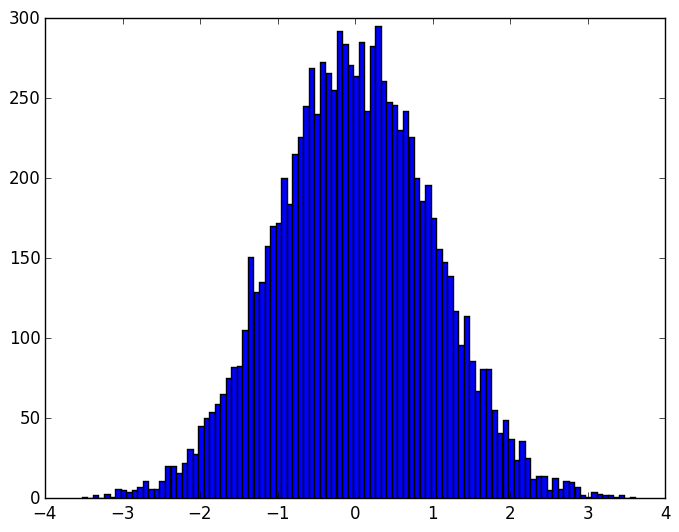

In [230]:
N = 10000
X = randn(N)
n = 100

xs,hist = histograma(X,n)

pop!(xs)

bar(xs, hist, width=0.07);

Ahora implementamos la funcion `histograma_2` que genera lo mismo que `histograma` pero cuidando que sólo se haga una lectura de los datos.

In [5]:
function histograma_2(X,n)
    
    X = sort(X)
    max = X[end]
    min = X[1]
    δ = abs(max - min)/n
    i = 1
    
    xs = [min + δ*m for m in 0:n]
    xs[n+1] = max
    
    hist = zeros(1:n)
    
    for j in 2:n+1
        while X[i] <= xs[j]
            hist[j-1] += 1
            if i == length(X)
                return xs, hist
            end
            i += 1
        end
    end
end
    

histograma_2 (generic function with 1 method)

La función `histograma_2`, es análoga a `histograma` también en su estructura, solo que ahora primero ordena los datos de X de menor a mayor, de tal forma que ahora cuando se fija el j-ésimo elemento de la partición es posible leer los primeros m datos hasta que ya no sean menores que el segundo elemento de la partición, por lo que ahora se fija el tercer elemento de la partición y se verifican todos los elementos que son menores a éste a partir del m-ésimo dato, y así sucesivamente. Por lo que ya no se vuelven a leer los datos anteriores al m$_j$ dato en el cual la condición de ser menor que el j-ésimo elemento de la partición ya no se cumple.

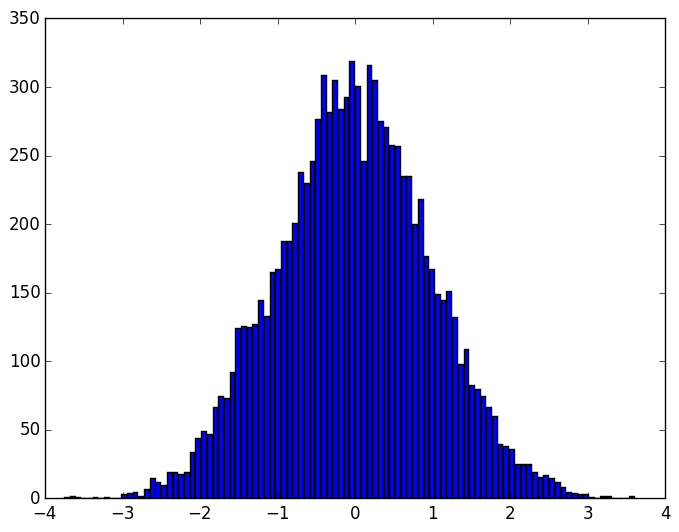

In [244]:
xs_1, hist_1 = histograma_2(X,n)

pop!(xs_1)

bar(xs_1, hist_1, width=0.061);

Ahora comparamos con la función para gráficar histogramas nativa de PyPlot, y notamos que es la misma a la generada por las funciones `histograma` y `histograma_2`.

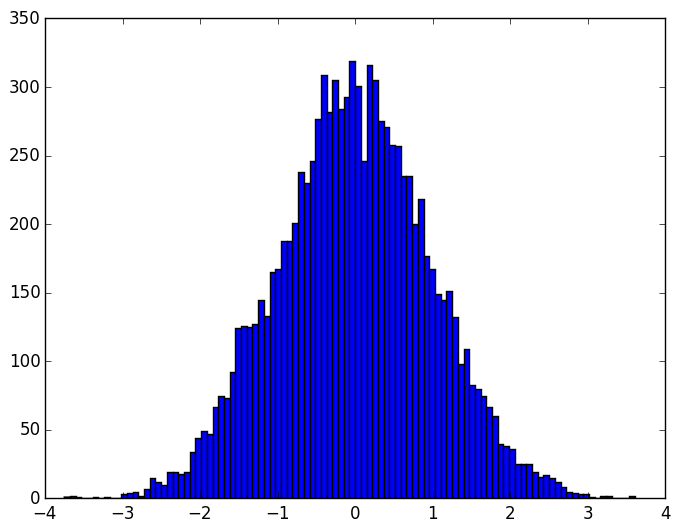

In [240]:
xs_2, hist_1 = histograma_2(X,n)

plt[:hist](X,xs_2);

In [35]:
@time histograma(X,n);

  0.039893 seconds (8 allocations: 1.953 KB)


In [36]:
@time histograma_2(X,n);

  0.012338 seconds (12 allocations: 783.391 KB)


Notamos que tanto `histograma` como `histograma_2` nos dan el mismo histograma, pero curiosamente el primero es más lento pero ocupa menos memoria, mientras que el segundo es más rápido pero ocupa considerablemente más memoria. 

## 2. Promedio y varianza

(a) Siguiendo con la generación de datos del ejercicio anterior, hagan una subrutina que calcule el promedio y la varianza de los datos generados anteriormente. Comparen su resultado con lo que se obtiene al utilizar `mean` y `var` (que son las funciones nativas de julia que hacen eso).
    
(b) Existe un [algoritmo recursivo](https://en.wikipedia.org/wiki/Algorithms_for_calculating_variance#Online_algorithm), ampliamente desconocido, que permite calcular el promedio y la varianza con una sóla lectura de los datos. Impleméntenlo. La *misma* función debería de darles *ambos* valores.
    
(c) ¿Cuál de todos los algoritmos es el más rápido? Consideren esto para datos de distinta longitud, cubriendo varios órdenes de magnitud.

In [183]:
function histograma_pv(X,n)
    """
    Esta función toma como argumentos (X,n), donde X es una arreglo de datos y n el numero de intervalos a generar. Y devuelve una 
    tupla (xs,histograma,promedio,varianza), donde xs es la partición de los datos con n intervalos y histograma un arreglo tal que
    la entrada m tiene la cantidad de datos que cae en el intervalo m.
    """ 
    
    X = sort(X)
    max = X[end]
    min = X[1]
    δ = abs(max - min)/n
    i = 1
    
    xs = [min + δ*m for m in 0:n]
    xs[n+1] = max
    hist = zeros(1:n)
    
    for j in 2:n+1
        while X[i] <= xs[j]
            hist[j-1] += 1
            if i == length(X)
                promedio = sum(X)/N
                varianza = 0
                for k in 1:N
                    varianza += (promedio - X[k])^2
                end
                varianza = sqrt(varianza/N)
                return xs, hist, promedio, varianza
            end
            i += 1
        end
    end
end

histograma_pv (generic function with 1 method)

In [247]:
xs_2, hist_2, promedio, varianza = histograma_pv(X,n)
println("promedio=$promedio, varianza=$varianza")

promedio=-0.016543743281276557, varianza=0.989039294992354


In [248]:
mean(X)

-0.01654374328127662

In [249]:
var(X)

0.9782965566946417

Notamos que la función nativa de Julia `mean` da el mismo resultado que la  función `promedio` que se implementó. Mientras que entre `var` (Julia) y `varianza` (Felipe) hay una diferencia, mínima pero la hay.

In [253]:
abs(varianza-var(X))

0.010742738297712329

Ahora implementamos el algoritmo recursivo sugerido para calcular la varianza y el promedio.

$$s_n^2 = \frac{M_{2,n}}{n-1}$$

$$M_{2,n} = M_{2,n-1} + (x_n - \bar{x}_{n-1})(x_n - \bar{x}_n)$$

In [250]:
function vp_recursivo(X)

    promedio = X[1]
    M = 0.0

    for i in 2:length(X)
        
        promedio_nuevo = promedio + (X[i]-promedio)/i
        M = M + (X[i]-promedio)*(X[i]-promedio_nuevo)
        promedio = promedio_nuevo
        varianza = M/(i-1)
        
    end
    return promedio, varianza
end

vp_recursivo (generic function with 1 method)

In [252]:
promedio, varianza = vp_recursivo(X)

(-0.016543743281276637,0.989039294992354)

Ahora comparamos los tres métodos para calcular varianza y promedio.

In [260]:
function vp(X)
    
    N = length(X)
    promedio = sum(X)/N
    varianza = 0
    for k in 1:N
         varianza += (promedio - X[k])^2
    end
     varianza = sqrt(varianza/N)
    
    return promedio, varianza
end

vp (generic function with 1 method)

In [261]:
vp(X)

(-0.01654374328127662,0.9890392949923562)

In [269]:
@time vp(X)

(-0.01654374328127662,0.9890392949923562)

0.000412 seconds (20.01 k allocations: 312.734 KB)


In [267]:
@time vp_recursivo(X)

(-0.016543743281276637,0.989039294992354)

0.000142 seconds (6 allocations: 208 bytes)


In [268]:
@time (mean(X),var(X))

(-0.01654374328127662,0.9782965566946417)

0.000034 seconds (10 allocations: 336 bytes)


Notamos que los tres métodos nos dan significativamente los mismo valores de *(promedio, varianza)*, sin embargo, las funciones nativas de Julia para calcularlos son las más rápidas.

## 3. Método de Simpson para integrar $f(x)$ en un intervalo

Implementen el método de Simpson para integrar una función arbitraria $f(x)$.

La aproximación de Simpson para integrar una función $f(x)$ es

$$\int^b_a f(x) dx \approx \frac{b-a}{6} \Big[ f(a) + 4\ f\Big(\frac{a+b}{2}\Big) + f(b)\Big]$$

In [194]:
function integral_simpson(f,a,b,n)
    
    δ = abs(b-a)/n
    xs = [a + δ*m for m in 0:n]
    
    simpson(f,a,b) = ((b-a)/6) * ( f(a) + 4*f((a+b)/2) + f(b) )
    integral = 0
    
    for i in 1:n
        integral += simpson(f,xs[i],xs[i+1])
    end
    
    return integral
end

integral_simpson (generic function with 1 method)

Probamos para la siguientes integrales:

$$\int^5_2 2x^3 dx = \Big[\frac{1}{2} x^4\Big]^5_2 = 304.5$$

In [197]:
2/4*(5^4 -  2^4)  

304.5

In [198]:
a = 2
b = 5
m = 10

integral_simpson(x -> 2*x^3, a, b, m)

304.5

$$\int^{\pi}_0 \sin{x} dx = \Big[-\cos{x}\Big]^{\pi}_0 = 2$$

In [199]:
a = 0
b = π
m = 10

integral_simpson(x -> sin(x), a, b, m)

2.000006784441801

In [200]:
a = 0
b = π
m = 100

integral_simpson(x -> sin(x), a, b, m)

2.0000000006764718

In [205]:
a = 0
b = π
m = 10000

integral_simpson(x -> sin(x), a, b, m)

2.000000000000001

In [212]:
a = 0
b = π
for i in 1:1000:30000
    m = 10000 + i
    println("$(integral_simpson(x -> sin(x), a, b, m))")
end

1.9999999999999953
1.9999999999999962
1.9999999999999953
2.0000000000000098
2.0000000000000036
1.9999999999999976
1.9999999999999982
1.999999999999987
2.000000000000005
1.999999999999991
2.0000000000000044
2.0000000000000027
1.9999999999999931
1.999999999999991
1.99999999999999
1.9999999999999998
2.0000000000000044
1.999999999999992
2.000000000000001
2.0000000000000044
1.9999999999999976
1.9999999999999984
1.9999999999999987
2.0
2.00000000000001
1.9999999999999971
2.000000000000001
1.9999999999999964
2.0000000000000124
2.000000000000002
